### Performing a Geographical Analysis of Restaurants in the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


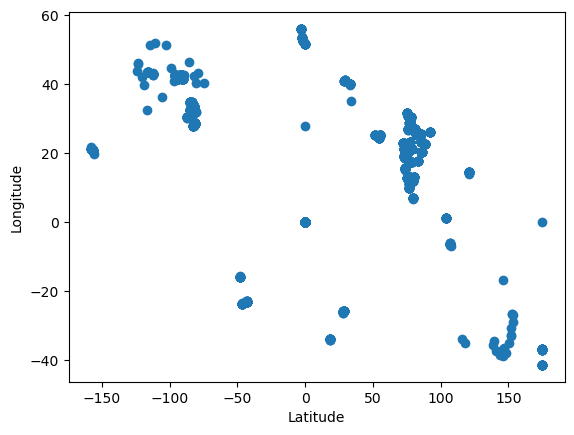

In [15]:
# Visualization
%matplotlib inline
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.scatter(df['Longitude'], df['Latitude'])
plt.show()
# Result shows us the distribution of restaurants in each continent

In [16]:
df['City'].unique().shape

(141,)

## Average Ratings according to City

In [17]:
# Finding out the average ratings according to city
average_rating = df.groupby('City')['Aggregate rating'].mean()

In [18]:
average_rating

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

## Average Ratings according to Locality

In [21]:
average_rating = df.groupby('Locality')['Aggregate rating'].mean()
average_rating

Locality
 ILD Trade Centre Mall, Sohna Road     3.050000
12th Square Building, Banjara Hills    4.300000
A Hotel, Gurdev Nagar                  3.600000
ARSS Mall, Paschim Vihar               3.100000
Aaya Nagar                             0.000000
                                         ...   
ibis New Delhi, Aerocity               1.550000
�ayyolu                                4.300000
�guas Claras                           3.666667
�ukurambar                             3.400000
��mitk�_y                              4.200000
Name: Aggregate rating, Length: 1208, dtype: float64

## Price Range according to city

In [19]:
average_price = df.groupby('City')['Price range'].mean()
average_price

City
Abu Dhabi          3.300000
Agra               2.650000
Ahmedabad          2.571429
Albany             1.700000
Allahabad          2.650000
                     ...   
Weirton            2.000000
Wellington City    3.250000
Winchester Bay     2.000000
Yorkton            2.000000
��stanbul          2.857143
Name: Price range, Length: 141, dtype: float64

## Price Range according to Locality

In [20]:
average_price = df.groupby('Locality')['Price range'].mean()
average_price

Locality
 ILD Trade Centre Mall, Sohna Road     1.500000
12th Square Building, Banjara Hills    3.000000
A Hotel, Gurdev Nagar                  2.000000
ARSS Mall, Paschim Vihar               2.000000
Aaya Nagar                             2.000000
                                         ...   
ibis New Delhi, Aerocity               2.000000
�ayyolu                                2.000000
�guas Claras                           3.666667
�ukurambar                             2.000000
��mitk�_y                              3.000000
Name: Price range, Length: 1208, dtype: float64

## Popular Cuisines according to city

In [31]:
popular_cuisines = df.groupby('City')['Cuisines'].agg(lambda x : x.mode().tolist())
popular_cuisines.head()

City
Abu Dhabi                   [American, Indian, Italian, Pizza]
Agra                                   [North Indian, Mughlai]
Ahmedabad    [Cafe, American, Continental, Armenian, Fast F...
Albany                                [Japanese, Steak, Sushi]
Allahabad                              [North Indian, Chinese]
Name: Cuisines, dtype: object

In [32]:
popular_cuisines.shape

(141,)

## Popular Cuisines according to Locality

In [34]:
popular_cuisines_locality = df.groupby('Locality')['Cuisines'].agg(lambda x : x.mode().tolist())
popular_cuisines_locality.head()

Locality
 ILD Trade Centre Mall, Sohna Road              [Cafe, Beverages, North Indian, Mughlai]
12th Square Building, Banjara Hills                     [Mughlai, North Indian, Chinese]
A Hotel, Gurdev Nagar                                 [North Indian, Chinese, Fast Food]
ARSS Mall, Paschim Vihar               [North Indian, South Indian, Chinese, Mithai, ...
Aaya Nagar                                                              [Cuisine Varies]
Name: Cuisines, dtype: object